In [288]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Python plotting library
import seaborn as sns # More snazzy plotting library


from datetime import datetime # Typcasting date of type object ans splitting it
from sklearn.preprocessing import StandardScaler # Feature Scaling (Normalizaiton) 

In [289]:
# reads the csv and creates the dataframe called fileData
fileData = pd.read_csv("train.csv") 

In [290]:
# Show dta shape (# rows, # columns)
fileData.shape

(10886, 12)

In [291]:
# Show first 5 rows of the data
fileData.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [292]:
fileData.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [293]:
# Check for missing values
fileData.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

##### Observing from above not having null values to handle(fill or drop)

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

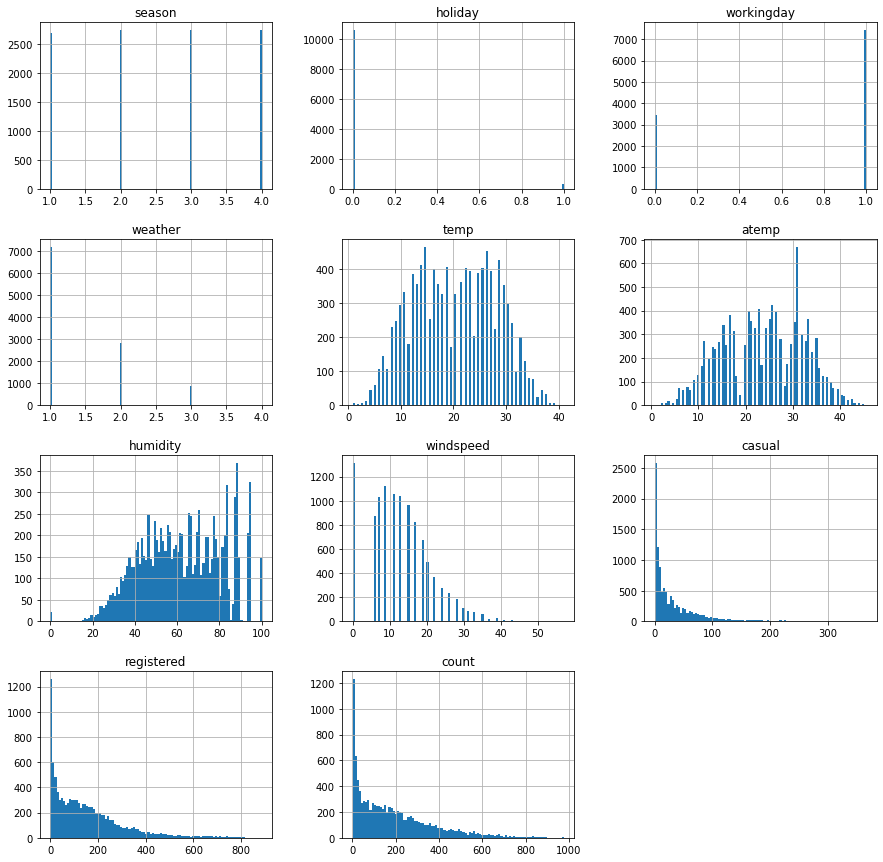

In [294]:
#Detect distribution and skewness for features
fileData.hist(figsize=(15,15), 
              bins=100
             )

In [295]:
# observe null values & data types for features
fileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### Observe having a feature with object type, that is (datetime). That needs to be formatted by
#####            1. convert datetime from object type to datetime
#####            2. split datetime column to year,month,weekday and hour 
##### Having categorical features represented in numbers, those are: Season, Holiday, Workingday, Weather

In [296]:
# convert datetime from object type to datetime
fileData.datetime = pd.to_datetime(fileData.datetime)

In [297]:
# split datetime column to year,month,weekday and hour 
fileData['year'] = fileData['datetime'].dt.year
fileData['month'] = fileData['datetime'].dt.month
fileData['weekday'] = fileData['datetime'].dt.day_name()
fileData['hour'] = fileData['datetime'].dt.hour

In [298]:
# drop datetime column
fileData.drop(["datetime"],axis=1, inplace=True)

In [299]:
fileData.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
weekday        object
hour            int64
dtype: object

###### Observing having an object feature (weekday), will frstly detect if there is correlation between that object and target variable to convert it to numeric. If not, get rid of it

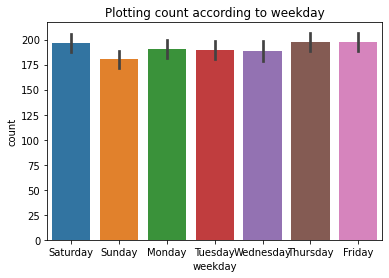

In [300]:
# Plotting count according to weekday
plt.title("Plotting count according to weekday")
sns.barplot(x = 'weekday', y = "count", data = fileData)
plt.show()

##### It's consistent in general throughout the week, then will drop it

In [301]:
# drop weekday feature
fileData.drop('weekday', axis=1, inplace=True)

### plot count distribution according to categorical fetures (season, holiday, workingday and weather) 

<ipython-input-302-f6d4bdba43db>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


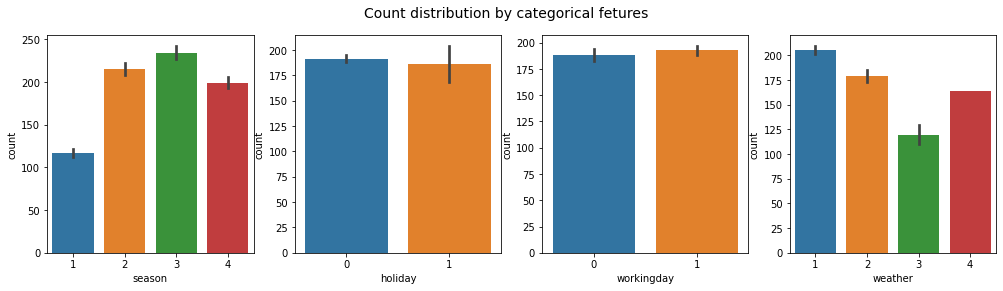

In [302]:
# Plot 4 plots side by side in one row 
fig, ax = plt.subplots(1,4, figsize=(17,4))

#title
fig.suptitle("Count distribution by categorical fetures", fontsize=14)
 
sns.barplot(x = "season", y = "count", data = fileData, ax = ax[0])
sns.barplot(x = "holiday", y = "count", data = fileData, ax = ax[1])
sns.barplot(x = "workingday", y = "count", data = fileData, ax = ax[2])
sns.barplot(x = "weather", y = "count", data = fileData, ax = ax[3])

fig.show()

##### The biggest amount of renting bikes is in sunny and clear weather
##### Count is almost consistent in general throughout the holiday & workingday. To make sure, will detect their correlation with (count) to decide to drop them or not
##### From Season distribution observing the least amount of renting bikes is in Spring 

<AxesSubplot:xlabel='weather', ylabel='count'>

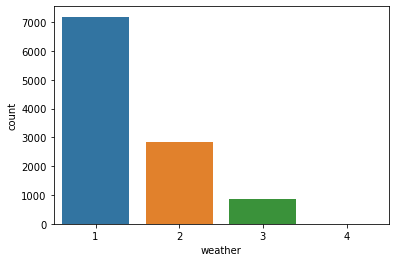

In [303]:
# distrbuiton of weather and its frequency
sns.countplot(x='weather', 
              data=fileData)

In [304]:
print(fileData['weather'].value_counts())

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


##### Observing from the 2 cells above the biggest frequency is in sunny and clear weather
##### The more rainy, cloudy and cold the weather is, the less teh frequency become

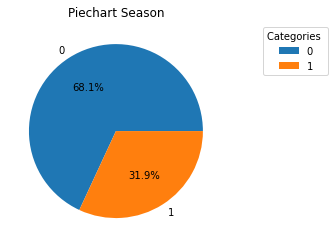

In [305]:
#  plotting the pie chart for (workingday) 
workingdayFrequency = fileData['workingday'].value_counts()
plt.pie(workingdayFrequency, 
        labels = fileData['workingday'].unique(),
        autopct = '%.1f%%'
       )

plt.title("Piechart Season")
plt.legend(title="Categories ",
          bbox_to_anchor=(0.5, 0, 1, 1)
          )
plt.show()

<AxesSubplot:>

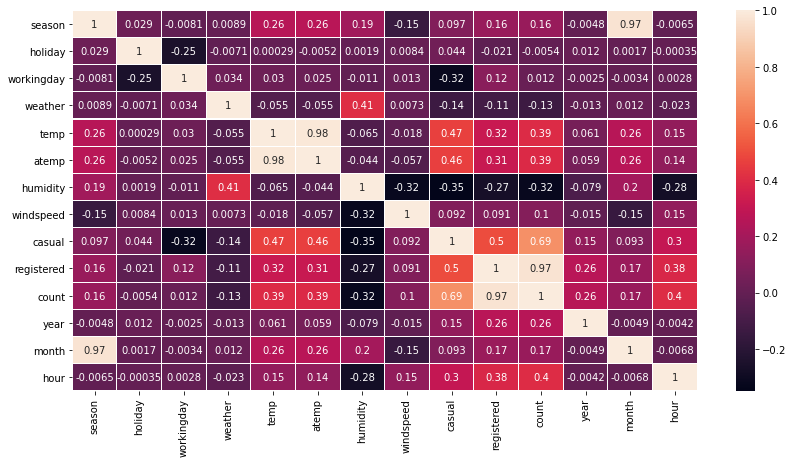

In [306]:
data_corr = fileData.corr()
plt.figure(figsize=(14,7))
sns.heatmap(data_corr, annot=True, linewidths=0.05)

##### There  is almost no correlation between (count) and categorical varibles (season, holiday, workingday, weather), drop them
##### observing that temp & atemp are highly correlated and affecting (count) feature in same proportion, as their function almost the same. Need to drop one of them.

### Drop atemp, season ,holiday, workingday and weather features

In [307]:
featuresToDrop = ['atemp','season','holiday','workingday','weather']
fileData.drop(featuresToDrop, axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

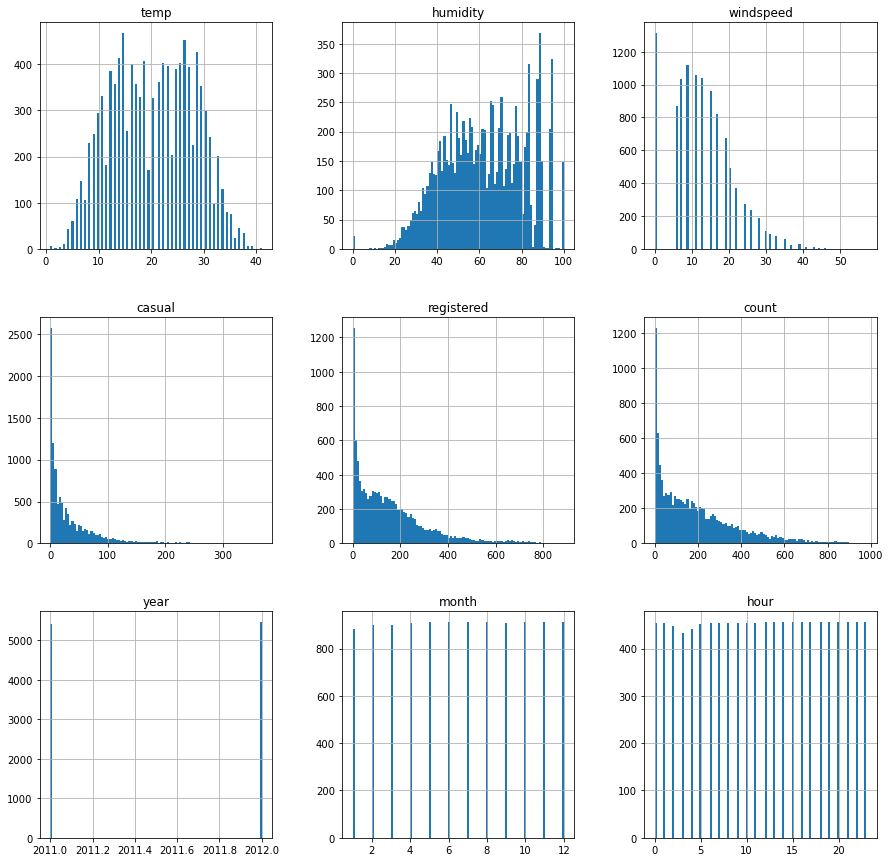

In [308]:
#Detect distribution and skewness for features
fileData.hist(figsize=(15,15), 
              bins=100
             )

##### Observe casual, registered and count features are right skewed, meaning having outliers needed to be handled
##### Identify outliers with the help of boxplot, to observe data points outside the range of the data

### Boxplot to observe outliers

<ipython-input-309-3800444b4013>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


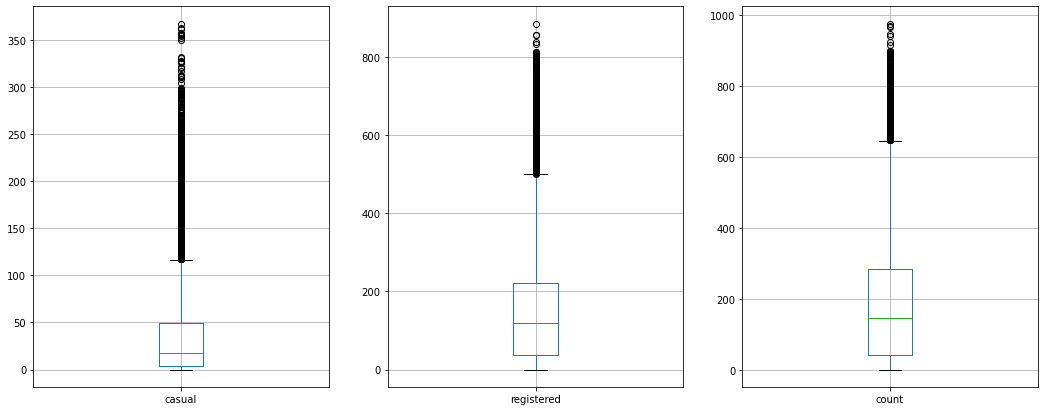

In [309]:
# To plot 3 plots on one row side by side
fig, ax = plt.subplots(1,3, figsize=(18,7))

# casual, registered and count customers box plots
fileData.boxplot("casual", ax=ax[0])
fileData.boxplot("registered", ax=ax[1])
fileData.boxplot("count", ax=ax[2])
fig.show()

In [310]:
fileData['count'].corr(fileData['registered'])

0.9709481058098282

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


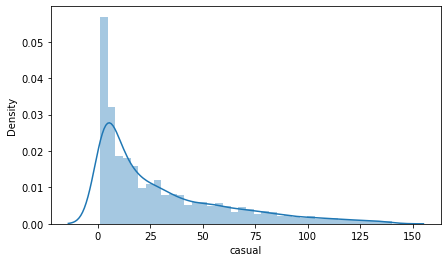

In [311]:
# Give us the (density)
plt.figure(figsize=(7,4)) # changing its size
sns.distplot(dataaa.casual)
plt.show()

In [312]:
#Dropping the outlier rows with Percentiles
upper_lim = fileData.quantile(.95)
lower_lim = fileData.quantile(.05)

fileData = fileData[(fileData < upper_lim) & (fileData > lower_lim)]

<ipython-input-313-3800444b4013>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


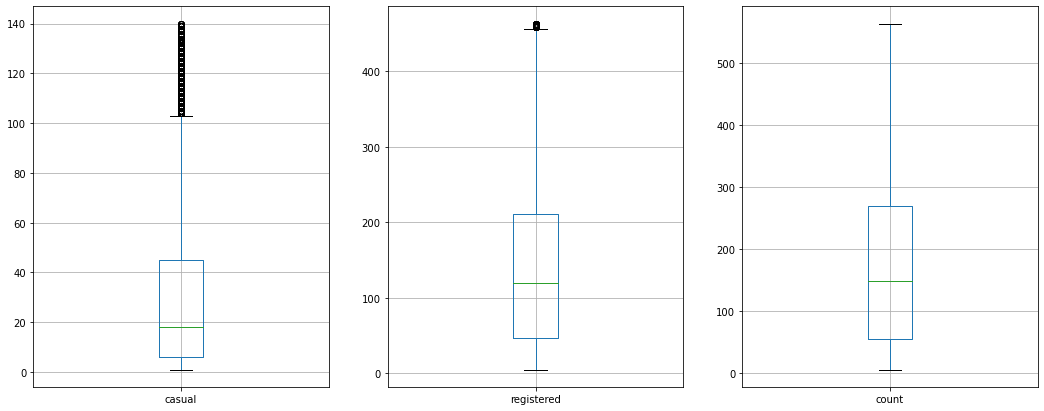

In [313]:
# To plot 3 plots on one row side by side
fig, ax = plt.subplots(1,3, figsize=(18,7))

# casual, registered and count customers box plots
fileData.boxplot("casual", ax=ax[0])
fileData.boxplot("registered", ax=ax[1])
fileData.boxplot("count", ax=ax[2])
fig.show()

##### casual still had some outliers, we can drop it as it's included in count

In [314]:
fileData.drop('casual', axis=1, inplace=True)

In [315]:
## Feature Scaling (Normalization)
StandardScaler().fit_transform(fileData) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[-1.61751053,  1.19892478,         nan, ...,         nan,
                nan,         nan],
       [-1.74364383,  1.13672086,         nan, ...,         nan,
                nan,         nan],
       [-1.74364383,  1.13672086,         nan, ...,         nan,
                nan, -1.65997215],
       ...,
       [-0.98684404, -0.04515352,  0.29909271, ...,         nan,
                nan,  1.64384009],
       [-0.98684404, -0.04515352, -1.34184706, ...,         nan,
                nan,         nan],
       [-1.11297733,  0.26586605, -0.7956817 , ...,         nan,
                nan,         nan]])